[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ynykrk7j)

## Introducción

En este notebook, vamos a explorar cómo cargar un dataset utilizando la biblioteca de Python, Pandas. Pandas es una herramienta poderosa que nos permite manipular y analizar datos de manera eficiente.

Para ilustrar este proceso, utilizaremos un dataset de clustering de clientes. Este dataset contiene información sobre los clientes de un centro comercial. El centro comercial quiere segmentar a sus clientes en grupos, para poder crear campañas de marketing dirigidas a grupos específicos de clientes.

A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

> **Nota:** Cambiar la ruta del archivo de acuerdo a la ubicación en su computadora.

In [1]:
# verificar si estamos en google colab


#     try:: Este bloque intenta importar la biblioteca google.colab.
#     import google.colab: Esta línea intenta importar la biblioteca google.colab, que solo está disponible en un entorno de Google Colab.
#     IN_COLAB = True: Si la importación es exitosa (lo que significa que se está ejecutando en Colab), la variable IN_COLAB se establece en True.
#     except:: Si la importación falla (porque no se está ejecutando en Colab), se ejecuta el código de este bloque.
#     IN_COLAB = False: Si la importación falla, la variable IN_COLAB se establece en False.

# Esto permite que el notebook adapte su comportamiento en función de si se está ejecutando en Colab u otro entorno.

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:
# Esta variable se estableció en la celda anterior para indicar si el notebook se está ejecutando en Google Colab (True) o no (False).

# La salida de esta celda te mostrará si el código detectó que se encuentra en un entorno Colab o no.

IN_COLAB

True

In [4]:

#     if IN_COLAB:: Esta línea verifica si la variable IN_COLAB es True. Si lo es, significa que el código se está ejecutando en Google Colab y se ejecutarán las siguientes líneas.
#     !wget -O datasets.zip https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip: Si está en Colab, este comando de shell descarga un archivo zip desde la URL proporcionada y lo guarda como datasets.zip. El ! al principio indica que es un comando de shell.
#     !unzip datasets.zip: Este comando de shell descomprime el archivo datasets.zip.
#     !mv CienciaDatos-MASDI-main/datasets datasets_github: Este comando de shell mueve la carpeta datasets dentro de la carpeta CienciaDatos-MASDI-main (que se creó al descomprimir) y la renombra a datasets_github.
#     !rm -rf datasets.zip CienciaDatos-MASDI-main: Finalmente, este comando de shell elimina el archivo datasets.zip y la carpeta CienciaDatos-MASDI-main para limpiar el espacio.

# En resumen, este código se asegura de que, si estás en Google Colab, tengas la carpeta datasets_github con los archivos necesarios para el resto del notebook. Si no estás en Colab, este bloque de código se omite.

if IN_COLAB:
    # download a folder from github
    !wget -O datasets.zip https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
    !unzip datasets.zip
    !mv CienciaDatos-MASDI-main/datasets datasets_github
    !rm -rf datasets.zip CienciaDatos-MASDI-main

--2025-09-30 23:07:09--  https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main [following]
--2025-09-30 23:07:09--  https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘datasets.zip’

datasets.zip            [   <=>              ]   4.65M  8.80MB/s    in 0.5s    

2025-09-30 23:07:10 (8.80 MB/s) - ‘datasets.zip’ saved [4873196]

Archive:  datasets.zip
abeb1d28b82ddc29672610eb9671688c6c3634a3
   creating: Ciencia-de-Datos-main/
  inflating: C

In [6]:

#     import os: Esta línea importa la biblioteca os, que proporciona una forma de interactuar con el sistema operativo.
#     dir_root = os.path.dirname(os.getcwd()):
#         os.getcwd(): Esta función devuelve la ruta del directorio de trabajo actual.
#         os.path.dirname(...): Esta función devuelve el nombre del directorio de una ruta determinada. En este caso, toma el directorio de trabajo actual y devuelve el directorio que lo contiene, que se considera el directorio raíz del proyecto.
#     dir_root: Esta línea simplemente imprime el valor de la variable dir_root, que contiene la ruta del directorio raíz.

# En resumen, este código obtiene la ruta del directorio principal donde se está ejecutando el notebook.

import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [8]:

#     import pandas as pd: Esta línea importa la biblioteca pandas y la renombra como pd para facilitar su uso. Pandas es una biblioteca fundamental para el análisis y manipulación de datos en Python.
#     datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets': Esta línea define el nombre de la carpeta donde se encuentran los conjuntos de datos. Utiliza una expresión condicional: si la variable IN_COLAB es True (lo que significa que se está ejecutando en Google Colab), el nombre de la carpeta será 'content/datasets_github'; de lo contrario, será 'datasets'. Esto permite que el código funcione tanto en Colab como en otros entornos.
#     ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'clustering', 'Mall_Customers.csv'): Esta línea construye la ruta completa al archivo CSV que se va a cargar. Utiliza os.path.join para unir de forma segura los diferentes componentes de la ruta, independientemente del sistema operativo. Combina el directorio raíz (dir_root), el nombre de la carpeta de los datasets (datasets_folder_name), el subdirectorio 'clustering' y el nombre del archivo 'Mall_Customers.csv'.
#     data = pd.read_csv(ruta_dataset): Esta es la línea principal que carga el conjunto de datos. La función pd.read_csv() lee el archivo CSV especificado por ruta_dataset y crea un DataFrame de pandas con los datos. El DataFrame se asigna a la variable data.
#     data.head(): Esta línea muestra las primeras 5 filas del DataFrame data. Es útil para tener una vista rápida de la estructura y el contenido del conjunto de datos que se acaba de cargar.

# En resumen, este código prepara la ruta del archivo del dataset y luego lo carga en un DataFrame de pandas para su posterior análisis.

# Importamos la biblioteca pandas
import pandas as pd

# definimos la ruta del dataset a cargar
datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets'
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'clustering', 'Mall_Customers.csv')
# Cargamos el dataset
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploranción del DataFrame

Una vez que el dataset se ha cargado en un DataFrame de Pandas, podemos explorar el dataset utilizando varias funciones de Pandas.


### 1. Obtener información sobre el DataFrame

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?


In [9]:
# data.info():

#     Muestra el tipo de objeto (<class 'pandas.core.frame.DataFrame'>).
#     Indica el rango de índices (RangeIndex: 200 entries, 0 to 199), lo que te dice cuántas filas tiene el DataFrame y el rango de sus índices.
#     Muestra el número total de columnas (Data columns (total 5 columns)).
#     Proporciona una lista de cada columna con la siguiente información:
#         El nombre de la columna (#, Column).
#         El número de valores no nulos en cada columna (Non-Null Count). Esto es útil para identificar si hay valores faltantes.
#         El tipo de datos de cada columna (Dtype). Por ejemplo, int64 para enteros, object para cadenas, etc.
#     Indica el tipo de datos de las columnas en general (dtypes: int64(4), object(1)), mostrando cuántas columnas tienen cada tipo de datos.
#     Muestra el uso de memoria del DataFrame (memory usage: 7.9+ KB).

# En resumen, data.info() es una forma rápida y útil de obtener una descripción general de la estructura de tu DataFrame, incluyendo los tipos de datos, la cantidad de valores no nulos y el uso de memoria. Esto te ayuda a entender el dataset antes de realizar análisis más profundos.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 2. Obtener estadísticas descriptivas del DataFrame

Es posible utilizar la función `describe()` para obtener estadísticas descriptivas del DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es el valor mínimo en una columna?
* ¿Cuál es el valor máximo en una columna?
* ¿Cuál es el valor medio en una columna?
* ¿Cuál es la desviación estándar en una columna?
* ¿Cuál es el valor mínimo en una fila?
* ¿Cuál es el valor máximo en una fila?
  

In [11]:
# data.describe():

#     count: El número de valores no nulos en cada columna.
#     mean: El promedio de los valores en cada columna.
#     std: La desviación estándar, que mide la dispersión de los datos.
#     min: El valor mínimo en cada columna.
#     25%: El primer cuartil (percentil 25), que indica que el 25% de los datos son menores o iguales a este valor.
#     50%: La mediana (percentil 50), que es el valor central de los datos.
#     75%: El tercer cuartil (percentil 75), que indica que el 75% de los datos son menores o iguales a este valor.
#     max: El valor máximo en cada columna.

# Estas estadísticas son muy útiles para comprender la distribución central, la dispersión y el rango de los valores en tus columnas numéricas.

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 3. Verificar si hay valores faltantes

Es posible utilizar la función `isnull()` para verificar si hay valores faltantes en el DataFrame.

In [10]:

#     data.isnull(): Esta parte crea un DataFrame del mismo tamaño que data, pero en lugar de los valores originales, contiene True donde hay un valor nulo (faltante) y False donde no lo hay.
#     .sum(): Esta parte suma los valores booleanos en cada columna. Como True se considera 1 y False se considera 0 en operaciones numéricas, el resultado es el número total de valores nulos en cada columna.

# La salida CustomerID 0, Gender 0, etc., indica que no hay valores faltantes en ninguna de las columnas de tu DataFrame.

data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### 4. Explorar la correlación entre las columnas

En un problema de clustering, es importante explorar la correlación entre las columnas. Esto nos permite responder preguntas como:

* ¿Qué columnas están altamente correlacionadas?
* ¿Qué columnas están débilmente correlacionadas?
* ¿Qué columnas no están correlacionadas?
* ¿Qué columnas son las más importantes para el problema de clustering?
* ¿Qué columnas son las menos importantes para el problema de clustering?
* ¿Qué columnas pueden ser eliminadas del DataFrame?
* ¿Qué columnas pueden ser características?
  

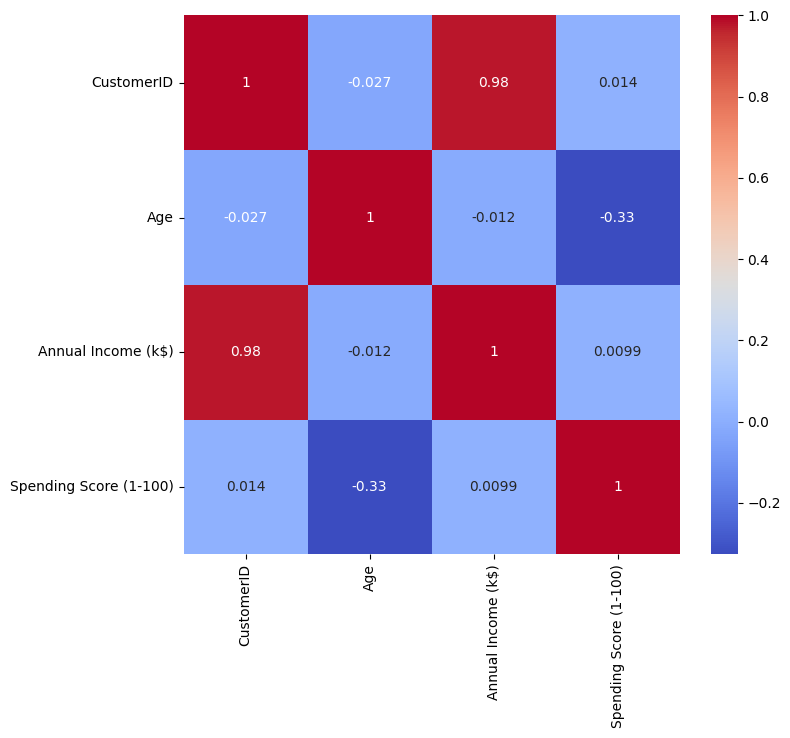

In [12]:

#     import seaborn as sns: Importa la biblioteca Seaborn, que se utiliza para crear visualizaciones estadísticas atractivas.
#     import matplotlib.pyplot as plt: Importa la biblioteca Matplotlib, que es una biblioteca de trazado para crear gráficos estáticos, interactivos y animados. Se usa junto con Seaborn.
#     correlation_matrix = data.corr(numeric_only=True): Calcula la matriz de correlación del DataFrame data. El argumento numeric_only=True asegura que solo se consideren las columnas numéricas para el cálculo de la correlación. La matriz de correlación muestra la relación lineal entre pares de columnas.
#     plt.figure(figsize=(8,7)): Crea una nueva figura de Matplotlib con un tamaño específico (8 pulgadas de ancho por 7 pulgadas de alto) para el gráfico.
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm'): Crea un mapa de calor (heatmap) utilizando Seaborn.
#         correlation_matrix: Son los datos que se visualizan en el mapa de calor.
#         annot=True: Muestra los valores de correlación en cada celda del mapa de calor.
#         cmap='coolwarm': Define el mapa de colores utilizado para el mapa de calor. 'coolwarm' usa colores fríos para correlaciones negativas y colores cálidos para correlaciones positivas.
#     plt.show(): Muestra el gráfico del mapa de calor.

# En resumen, este código te ayuda a visualizar rápidamente qué columnas numéricas están correlacionadas entre sí, lo cual es útil para entender las relaciones en tus datos.

import seaborn as sns
import matplotlib.pyplot as plt
# Suponiendo que 'data' es tu DataFrame
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 5. Explorar la distribución de las columnas

Es posible utilizar la función `hist()` para explorar la distribución de las columnas numéricas.

Esto nos permite responder preguntas como:

* ¿Qué columnas tienen una distribución normal?

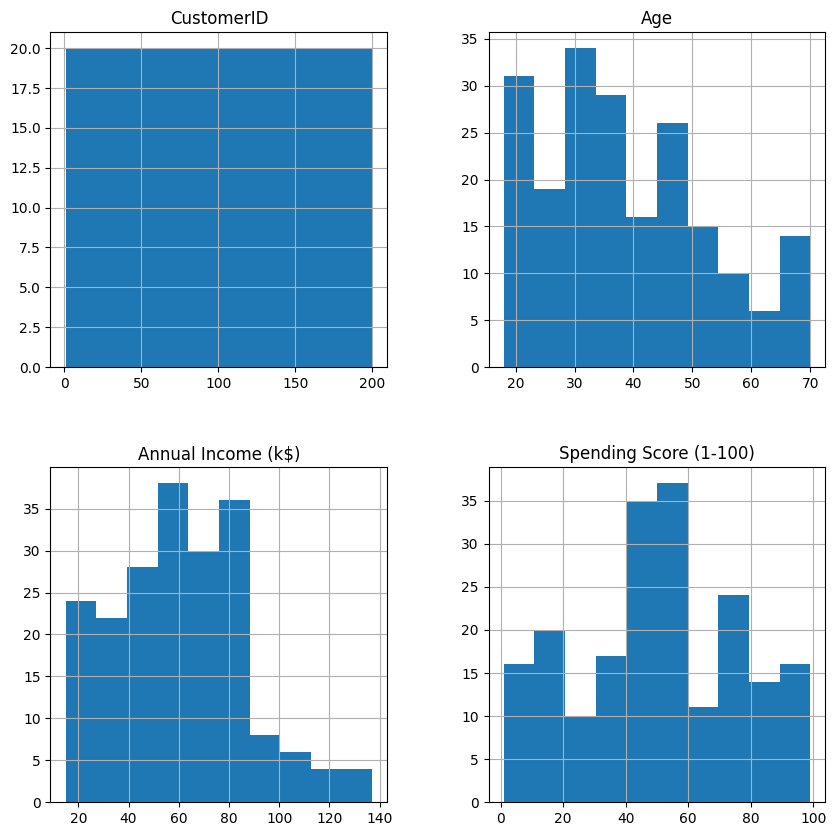

In [13]:

#     data.hist(figsize=(10, 10)): Esta línea llama al método hist() del DataFrame data. Este método crea histogramas para cada columna numérica en el DataFrame. El argumento figsize=(10, 10) especifica el tamaño de la figura en la que se dibujarán los histogramas, haciéndola de 10 pulgadas por 10 pulgadas.
#     plt.show(): Esta línea muestra la figura que contiene todos los histogramas generados.

# En resumen, este código te permite ver rápidamente la forma de la distribución de cada una de tus variables numéricas, lo que puede ayudarte a identificar patrones como distribuciones normales, sesgadas, o la presencia de valores atípicos.

data.hist(figsize=(10, 10))
plt.show()

### 6. Explorar la distribución de las variables categóricas

Es posible utilizar la función `value_counts()` para explorar la distribución de las variables categóricas.

Esto nos permite responder preguntas como:

* ¿Cuántas categorías hay en una columna?
* ¿Cuántas filas pertenecen a cada categoría en una columna?


In [14]:

#     data["Gender"]: Esto selecciona la columna "Gender" de tu DataFrame data.
#     .value_counts(): Esta función se aplica a la Serie (columna) seleccionada y devuelve una nueva Serie que contiene el recuento de cada valor único en la columna "Gender". Los valores únicos se convierten en el índice de la nueva Serie, y los recuentos correspondientes se convierten en los valores.

# La salida te muestra cuántas veces aparece cada categoría (en este caso, 'Female' y 'Male') en la columna "Gender". Es útil para entender la distribución de las variables categóricas.

data["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


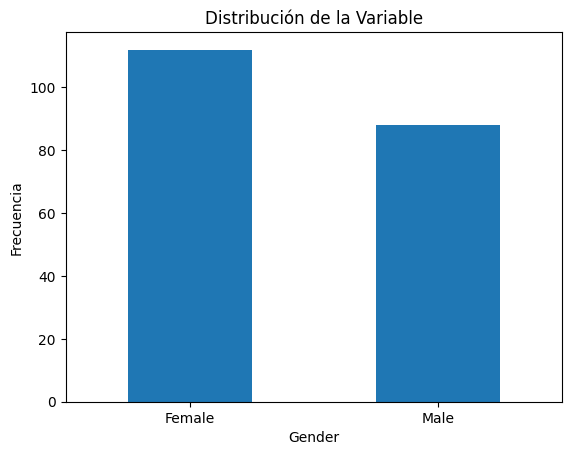

In [ ]:

#     count_classes = pd.value_counts(data['Gender'], sort = True):
#         data['Gender']: Selecciona la columna "Gender" del DataFrame data.
#         pd.value_counts(...): Esta función cuenta cuántas veces aparece cada valor único en la columna "Gender".
#         sort = True: Ordena los resultados en orden descendente por frecuencia.
#         count_classes = ...: Asigna el resultado (una Serie con los recuentos de cada género) a la variable count_classes.
#     count_classes.plot(kind = 'bar', rot=0):
#         count_classes.plot(...): Llama al método de trazado de la Serie count_classes.
#         kind = 'bar': Especifica que el tipo de gráfico a crear es un gráfico de barras.
#         rot=0: Establece la rotación de las etiquetas del eje x a 0 grados (horizontal).
#     plt.title("Distribución de la Variable"): Establece el título del gráfico.
#     plt.ylabel("Frecuencia"): Establece la etiqueta del eje y como "Frecuencia".
#     plt.xlabel("Genero"): Establece la etiqueta del eje x como "Genero".
#     Aunque no está explícitamente en la línea seleccionada, plt.show() (que se importó en una celda anterior) se utiliza para mostrar el gráfico.

# En resumen, este código cuenta la cantidad de hombres y mujeres en el dataset y luego lo representa visualmente en un gráfico de barras para mostrar claramente la distribución de género.

# Ahora que hemos explorado y visualizado algunas características del dataset, ¿te gustaría continuar con el proceso de clustering? Podríamos, por ejemplo, comenzar con el preprocesamiento de los datos o aplicar un algoritmo de clustering como K-Means.

# Visualizar la distribución de variables categóricas
count_classes = pd.value_counts(data['Gender'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("Genero")